# South African Language Identification

Exam EDSA 2201 & 2207 classification hackathon


# 1. INTRODUCTION
## Exam overview

South Africa is a cosmopolitan nation distinguished by its extensive language diversity. In South African society, language plays a vital role in social, cultural, intellectual, economic, and political life. It can also be utilized to strengthen democracy.


With 11 official languages, all of which are given equal status, the nation is multilingual. The majority of South Africans are bilingual and can speak two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.



# 2. Problem statement

To determine the language of a text that is in one of South Africa's 11 official languages.

# **3. Datasets imports**
I will import necessary packages for data manupulation e.g numpy, data viewing e.g pandas, plotting e.g matplot library, seaborn and additional packages for text processing and numerical computations.

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
from nltk.tokenize import word_tokenize,TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

The next step is to import the available data for analysis.
>For the purpose of this exam, we have been provided with the following data:
>1. train.csv :- This data will be used for training the model
>2. test.csv :- This data will test the model for the purpose of kaggle competition
>3. Sample_submission.csv :- Contain a sample submission on kaggle

Import the data to be used

In [198]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

## 4. Data preprocessing

In [199]:
# let's examine the first five (5) rows of the train data
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [200]:
# the first five rows for the test data
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## Insights 
Let us examining the properties of our data.

In [201]:
train.shape

(33000, 2)

In [202]:
test.shape

(5682, 2)

The train contains 33000 rows and 2 columns, while the test data contains 5682 rows and 2 columns.

In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [204]:
# let check for missing value in the train data
train.isnull().sum(axis=0)

lang_id    0
text       0
dtype: int64

In [205]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [206]:
# let check for missing value in the test data
test.isnull().sum(axis=0)

index    0
text     0
dtype: int64

Simply displaying the train and test data to have a look at the actual data contained within the first 5 columns.

The lang_id column contains differnet languages.

The text column contains messages from different people expressing their views in different languages.

There are no null values in the  data, so we can proceed to data cleaning.

# **5. Exploratory Data Analysis**
The following section provides an overview of the given data. We will looks at  some key insights of the raw data as well as the sentiment distribution of the data. In addition we will visualise the word frequency of messages of the unprocessed train and test data.
We will try to dig deep into both the training and testing data to ensure that our data meets the following:
>1. Correctly formatted
>2. Have the correct data types
>4. Correctly distributed i.e., normally distributed
>5. No coliniarity for classification problem or no multicoliniarity for regression problem

Exploratory data analysis is the key that will lead us to feature engineering and choosing the right machine learning algorithm for the data.

In [207]:
#check how the lang_id are distributed 
train.groupby(by='lang_id').count() #we check the distribution of the sentiment

,text
lang_id,
afr,3000
eng,3000
nbl,3000
nso,3000
sot,3000
ssw,3000
tsn,3000
tso,3000
ven,3000


## Natural language processing

Creating a function that will handle natural language processing of the text automatically.

In [208]:
def nlp_function(text): 
    
    #Removing the punctuations
    punc_numbers = string.punctuation + '0123456789'
    text = ''.join([l for l in text if l not in punc_numbers])
    text = re.sub(r'[[]]', ' ', text)
    
    #Tokenise the text
    tokeniser = TreebankWordTokenizer()
    text= tokeniser.tokenize(text)
    
    return text

In [209]:
#make a copy of the train data set and apply NLP on it
train1 =  train.copy()
train1['text'] = train1['text'].apply(nlp_function)
train1.head()

,lang_id,text
0,xho,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,"[the, province, of, kwazulunatal, department, ..."
3,nso,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [210]:
def separate(text):
    text = ' '.join(t for t in text if t)
    return text
    
train1['text1'] = train1['text'].apply(separate)
train1.head()

,lang_id,text,text1
0,xho,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,"[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,"[the, province, of, kwazulunatal, department, ...",the province of kwazulunatal department of tra...
3,nso,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...
4,ven,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


## Most Frequent words

In [211]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [212]:
lang_labels = list(train1.lang_id.unique())
print(lang_labels)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [213]:
lang_dic = {}
for label in lang_labels:
    df = train1.groupby('lang_id')
    lang_dic[label] = {}
    for row in df.get_group(label)['text']:
        lang_dic[label] = bag_of_words_count(row, lang_dic[label])

In [214]:
all_words = set()
for label in lang_labels:
    for word in lang_dic[label]:
        all_words.add(word)

In [215]:
lang_dic['all'] = {}
for label in lang_labels:    
    for word in all_words:
        if word in lang_dic[label].keys():
            if word in lang_dic['all']:
                lang_dic['all'][word] += lang_dic[label][word]
            else:
                lang_dic['all'][word] = lang_dic[label][word]

In [216]:
total_words = sum([v for v in lang_dic['all'].values()])
total_words

1223491

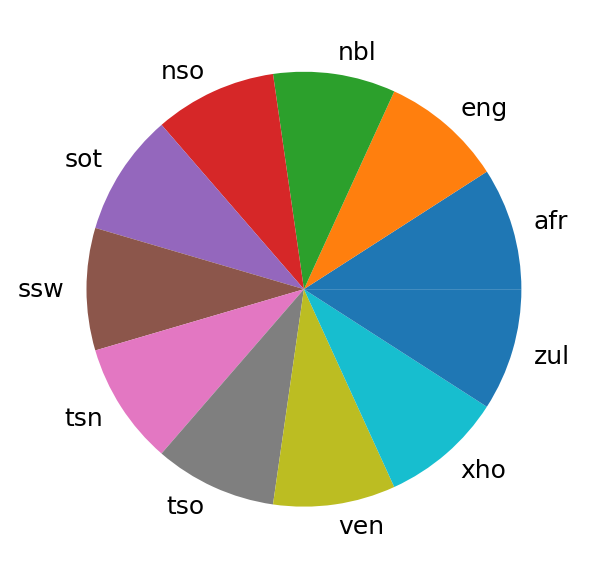

In [217]:
m = train.groupby(by='lang_id').count() #this code group the train data by lang_id and make a count of each language
values = m['text'].to_list() # values contain the total counts of each language
m_index = m.index.to_list() # m_index contain the label of each language

#the code below will plot a pie chart showing the percentage of each lang_id
plt.pie(values, labels=m_index)
plt.show()

Text(0.5, 0, 'word frequency')

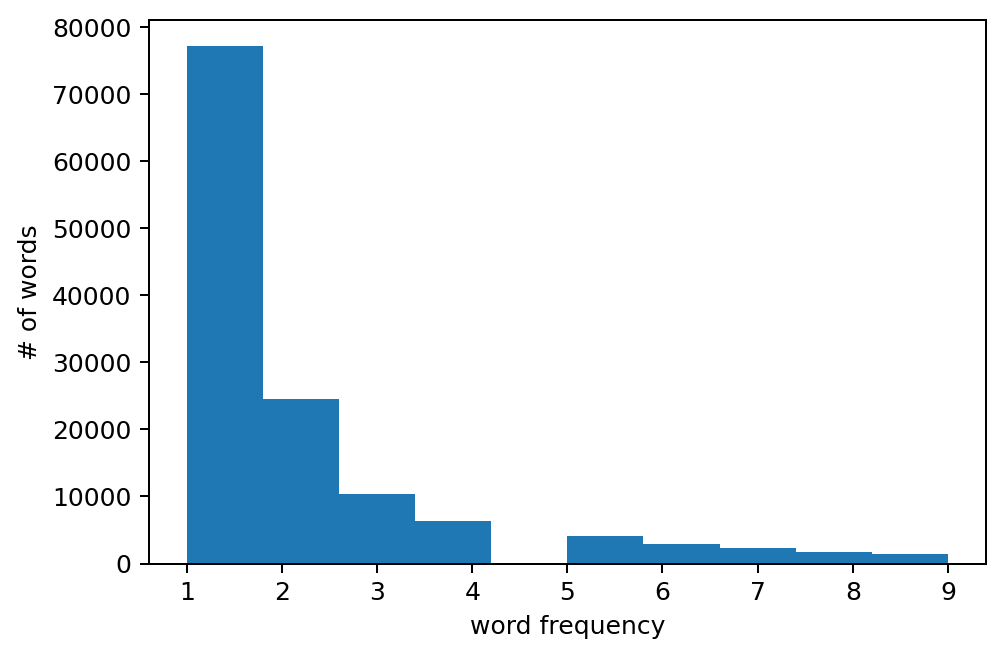

In [218]:
_ = plt.hist([v for v in lang_dic['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [219]:
len([v for v in lang_dic['all'].values() if v == 1])

77259

In [220]:
rare_words = [k for k, v in lang_dic['all'].items() if v==1] 
print(rare_words[:100])

['awusayine', 'liceba', 'ukongezelelwa', 'upheleleyo', 'kukud', 'ngokuthoba', 'ungumhlolo', 'eligqunyiweyo', 'zokuthinjwa', 'yilonto', 'izikhuseli', 'nomnikezi', 'zetrektara', 'ezithethwa', 'netyhefu', 'nangaliphi', 'zizixhaso', 'zingarhoxiswa', 'nasekukhuliseni', 'kwelicandelwano', 'kuyakrokrisa', 'yaphula', 'bafihle', 'kufungie', 'yenzekile', 'kuhlahlolwabiwomali', 'ngabahlohli', 'kwemithethosiseko', 'kubusuku', 'kangangomlinganiselo', 'wokudlakazeliswa', 'nobudoda', 'elithamsanqa', 'lungaphakathi', 'zocalucalulo', 'sayamene', 'kwabakho', 'iphakamise', 'kwisicocimoya', 'busengozini', 'sobudlelwane', 'ezikweli', 'yemvumelwano', 'yimiqobo', 'esezikho', 'abungxanyelwa', 'ukwabonakalisa', 'lamanqanaba', 'wonyango', 'isithinteli', 'unyanzelise', 'kwanokuqinisa', 'anxitywe', 'nesakhe', 'sisikolo', 'nkeazo', 'ababehlelelekile', 'yepemithi', 'yipublic', 'azikadweliswa', 'sibakhupha', 'yimpendulo', 'abakwinzima', 'kwabarhanelwa', 'mabafikelele', 'ukhathalelo', 'olwandayo', 'lamathala', 'banxi

In [221]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in lang_dic['all'].values() if v >=10]))
occurs_more_than_10_times = sum([v for v in lang_dic['all'].values() if v >=10])
print(occurs_more_than_10_times)

13223
959473


In [222]:
occurs_more_than_10_times/total_words

0.7842092831087437

In [223]:
max_count = 2
remaining_word_index = [k for k, v in lang_dic['all'].items() if v > max_count]

In [224]:
hm = []
for p, p_bow in lang_dic.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in remaining_word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big dataframe
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

In [225]:
df_bow.sort_values(by='all', ascending=False).head(20)

,xho,eng,nso,ven,tsn,nbl,zul,ssw,tso,sot,afr,all
Word,,,,,,,,,,,,
ya,1.0,0.0,6469.0,5158.0,6550.0,0.0,1.0,4.0,4126.0,5931.0,0.0,28240
a,85.0,2590.0,4255.0,3435.0,4016.0,72.0,203.0,62.0,2813.0,3577.0,137.0,21245
le,268.0,1.0,6434.0,6.0,6787.0,193.0,113.0,11.0,522.0,6737.0,4.0,21076
ka,47.0,0.0,6427.0,7.0,4339.0,188.0,135.0,0.0,1895.0,5130.0,0.0,18168
go,0.0,14.0,9172.0,1.0,7915.0,0.0,0.0,0.0,0.0,0.0,0.0,17102
e,22.0,46.0,3765.0,91.0,6435.0,25.0,33.0,30.0,41.0,5109.0,26.0,15623
na,358.0,3.0,437.0,5130.0,398.0,39.0,8.0,44.0,3988.0,413.0,385.0,11203
u,9.0,1.0,0.0,8191.0,1.0,5.0,28.0,5.0,1425.0,0.0,499.0,10164
die,0.0,1.0,0.0,3.0,2.0,1.0,0.0,2.0,1.0,1.0,10044.0,10055


In [226]:
def choose(text):
    text = ' '.join(l for l in text if l in remaining_word_index)
    return text

In [227]:
train1['text2'] = train1['text'].apply(choose)
train1.head()

,lang_id,text,text1,text2
0,xho,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,"[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...,idha iya kuba umsebenzi na kwisebe kwiimfuno z...
2,eng,"[the, province, of, kwazulunatal, department, ...",the province of kwazulunatal department of tra...,the province of kwazulunatal department of tra...
3,nso,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


## Direction to model training

Assigning the y variable numbers or encoding y

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(train1['lang_id'])

In [229]:
# List of label encoder types to use for lookup 
lang_labels = list(le.classes_)
lang_labels

['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven', 'xho', 'zul']

In [230]:
text1 = train1['text2']

vectorizer = CountVectorizer()
X_vectorized1 = vectorizer.fit_transform(text1)

Turning the predictor variables into vectors

In [231]:
data = train1['text1']

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
X_vectorized = vectorizer.fit_transform(data)

Spiliting the data into test and validation sets

In [232]:
# Splitting the training data into 80% training and 20% training
X_train, X_test, y_train, y_test = train_test_split(X_vectorized1, y, test_size=0.25, random_state=42)

## Model exploration

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Logistic regrassion

In [234]:
#creating an instance
lr = LogisticRegression(random_state = 42)

In [235]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [236]:
y_pred = lr.predict(X_test)

In [237]:
print(metrics.confusion_matrix(y_test,y_pred))
print("\n\nThe accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

[[751   0   0   0   0   3   0   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   0]
 [  0   0 727   0   0   0   0   0   0   2   5]
 [  0   0   0 779   1   0   2   0   0   0   0]
 [  0   0   1   0 758   0   0   0   0   0   0]
 [  0   0   0   0   0 730   0   0   0   0   2]
 [  1   0   0   1   3   0 740   0   1   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   1   0   0   1   0   0   0 755   4]
 [  0   1   9   0   0   1   0   0   0   4 720]]


The accuracy score of the SVC is: 0.9947878787878788


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       0.99      0.99      0.99       734
           3       1.00      1.00      1.00       782
           4       0.99      1.00      1.00       759
           5       0.99      1.00      1.00       732
           6       1.

## SVC

In [238]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred1))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred1))

The accuracy score of the SVC is: 0.9941818181818182


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       754
           1       1.00      1.00      1.00       762
           2       0.99      0.99      0.99       734
           3       1.00      0.99      1.00       782
           4       0.99      1.00      1.00       759
           5       0.99      1.00      0.99       732
           6       1.00      0.99      0.99       746
           7       1.00      1.00      1.00       700
           8       1.00      1.00      1.00       785
           9       1.00      0.99      0.99       761
          10       0.98      0.98      0.98       735

    accuracy                           0.99      8250
   macro avg       0.99      0.99      0.99      8250
weighted avg       0.99      0.99      0.99      8250



In [239]:
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
y_pred2 = svc1.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred2))
print("\n\nThe accuracy score of the SVC is:", accuracy_score(y_test, y_pred2))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred2))

[[749   1   0   0   0   3   0   0   0   1   0]
 [  0 761   1   0   0   0   0   0   0   0   0]
 [  1   0 722   0   0   0   0   0   0   2   9]
 [  0   0   1 777   1   0   3   0   0   0   0]
 [  0   0   0   0 758   0   0   0   0   1   0]
 [  0   0   0   0   0 730   0   0   0   0   2]
 [  1   0   0   1   3   0 740   0   1   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   1   0   0   0   0   0   0 753   7]
 [  0   1   6   0   0   2   0   0   0   7 719]]


The accuracy score of the SVC is: 0.9932121212121212


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       754
           1       1.00      1.00      1.00       762
           2       0.99      0.98      0.99       734
           3       1.00      0.99      1.00       782
           4       0.99      1.00      1.00       759
           5       0.99      1.00      1.00       732
           6       1.

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [241]:
algs = [LogisticRegression(random_state = 5), SVC(kernel = 'linear', random_state = 5), SVC(kernel = 'rbf', random_state = 5)
        ,MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth=6),RandomForestClassifier()]

In [242]:
for i in range(0, len(algs)):
    text_clf = Pipeline([('clf', algs[i])])
    ##lowercase = True,stop_words='english', ngram_range=(1, 2), analyzer='word',max_df = 0.8
    text_clf.fit(X_train, y_train)  
    predictions = text_clf.predict(X_test)
    
    
    print(algs[i])
    print(metrics.confusion_matrix(y_test,predictions))
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),5))
    print('-------------------------------------------------------')

LogisticRegression(random_state=5)
[[751   0   0   0   0   3   0   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   0]
 [  0   0 727   0   0   0   0   0   0   2   5]
 [  0   0   0 779   1   0   2   0   0   0   0]
 [  0   0   1   0 758   0   0   0   0   0   0]
 [  0   0   0   0   0 730   0   0   0   0   2]
 [  1   0   0   1   3   0 740   0   1   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   1   0   0   1   0   0   0 755   4]
 [  0   1   9   0   0   1   0   0   0   4 720]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       0.99      0.99      0.99       734
           3       1.00      1.00      1.00       782
           4       0.99      1.00      1.00       759
           5       0.99      1.00      1.00       732
           6       1.00      0.99      0.99       746
           7  

RandomForestClassifier()
[[753   0   0   0   0   1   0   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   0]
 [  1   1 694   0   0  11   0   0   0  10  17]
 [  0   0   0 779   1   0   2   0   0   0   0]
 [  0   0   0   1 758   0   0   0   0   0   0]
 [  0   1   2   0   0 706   0   0   0   0  23]
 [  1   0   0   0   2   0 743   0   0   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   5   0   0   6   0   0   0 734  16]
 [  0   2  12   0   0   7   0   0   0  15 699]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       0.99      1.00      1.00       762
           2       0.97      0.95      0.96       734
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       0.97      0.96      0.97       732
           6       1.00      1.00      1.00       746
           7       1.00 

In [243]:
NB_param=NB.get_params()
NB_param

{'alpha': 0.001, 'class_prior': None, 'fit_prior': True}

In [244]:
alpha = [0.001, 0.01, 0.1, 1, 10]

In [245]:
from sklearn.model_selection import GridSearchCV
nfolds = 2
param_grid = {
    'alpha'     : alpha, 
    }

grid_NB = GridSearchCV(MultinomialNB(), param_grid, scoring='f1', cv=nfolds)
grid_NB.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [246]:
grid_NB.best_params_

{'alpha': 0.001}

In [247]:
NB = MultinomialNB(alpha = 0.001)

In [248]:
NB.fit(X_train,y_train)
y_predB = NB.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predB))
print("\n\nThe accuracy score of the SVC is:", accuracy_score(y_test, y_predB))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_predB))

[[754   0   0   0   0   0   0   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   0]
 [  0   0 733   0   0   0   0   0   0   0   1]
 [  0   0   0 780   2   0   0   0   0   0   0]
 [  0   0   0   0 759   0   0   0   0   0   0]
 [  0   0   0   0   0 732   0   0   0   0   0]
 [  1   0   0   0   0   0 745   0   0   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   1   0   0   0   0   0   0 760   0]
 [  0   0   2   0   0   0   0   0   0   1 732]]


The accuracy score of the SVC is: 0.999030303030303


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      1.00      1.00       734
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6       1.0

## Hyperparameter tuning of MultinomialNB

Alpha option to choose from

In [249]:
alpha = [0.001, 0.01, 0.1, 1, 10]

Making a grid search for the model

In [250]:
from sklearn.model_selection import GridSearchCV
nfolds = 2
param_grid = {
    'alpha'     : alpha, 
    }

grid_NB = GridSearchCV(MultinomialNB(), param_grid, scoring='f1', cv=nfolds)
grid_NB.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

Searching for the best hyperparameters

In [251]:
grid_NB.best_params_

{'alpha': 0.001}

Buildig the model

In [252]:
NB_1 = MultinomialNB(alpha = 0.001)

In [253]:
NB_1.fit(X_train,y_train)
y_predB = NB_1.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predB))
print("\n\nThe accuracy score of the MultinomialNB is:", accuracy_score(y_test, y_predB))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_predB))

[[754   0   0   0   0   0   0   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   0]
 [  0   0 733   0   0   0   0   0   0   0   1]
 [  0   0   0 780   2   0   0   0   0   0   0]
 [  0   0   0   0 759   0   0   0   0   0   0]
 [  0   0   0   0   0 732   0   0   0   0   0]
 [  1   0   0   0   0   0 745   0   0   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   1   0   0   0   0   0   0 760   0]
 [  0   0   2   0   0   0   0   0   0   1 732]]


The accuracy score of the MultinomialNB is: 0.999030303030303


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       762
           2       1.00      1.00      1.00       734
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       759
           5       1.00      1.00      1.00       732
           6

Storing the names of the models and initialising them.

In [254]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM',          
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [255]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]

## Model evaluation

Training and checking the perfomace of the models.

results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    
    f1        = metrics.f1_score(y_train, y_pred)    
    f1_test   = metrics.f1_score(y_test, y_pred_test)    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

## Testing data

Clean the same way as the training data.

In [256]:
test1 =  test.copy()
test1['text'] = test1['text'].apply(nlp_function)
test1.head()

,index,text
0,1,"[Mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,"[Winste, op, buitelandse, valuta]"


In [257]:
def separate(text):
    text = ' '.join(t for t in text if t)
    return text
    
test1['text1'] = test1['text'].apply(separate)
test1.head()

,index,text,text1
0,1,"[Mmasepala, fa, maemo, a, a, kgethegileng, a, ...",Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em...",Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",Tshivhumbeo tshi fana na ngano dza vhathu
3,4,"[Kube, inja, nelikati, betingevakala, kutsi, t...",Kube inja nelikati betingevakala kutsi titsini...
4,5,"[Winste, op, buitelandse, valuta]",Winste op buitelandse valuta


Make predictions

In [258]:
text2 = test1['text1']
X_vect = vectorizer.transform(text2)

In [261]:
y_test_pred = NB_1.predict(test_X)

ValueError: X has 144197 features, but MultinomialNB is expecting 42430 features as input.

In [263]:
y_test_pred3 = le.inverse_transform(y_test_pred)

NameError: name 'y_test_pred' is not defined

Getting the predicted encoded labels back to text.

In [262]:
y_test_pred
1 = le.inverse_transform(y_test_pred) y_test_pred1

y_test_pred

y_test_pred2 = svc.predict(test_X)

SyntaxError: invalid syntax (<ipython-input-262-d39c57f53c85>, line 2)

In [ ]:
y_test_pred3 = le.inverse_transform(y_test_pred)

## Saving to CSV file

In [ ]:
submission = pd.DataFrame({'index':test1['index'],
                          'lang_id':y_test_pred3})

In [ ]:
submission.to_csv('Seromo_Podile_Classification_Hack7.csv',index=False)

## Saving the model


In [ ]:
import pickle
model_save_path = "NB.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(NB,file)